#                        King County Home Price Predictions

In [1]:
#import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
sns.set()
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#read in dataset into pandas
df = pd.read_csv('housesalesprediction/kc_house_data.csv')

In [3]:
#inspect how many rows and columns are in datasest
df.shape

(21613, 21)

In [4]:
#view first couple rows to make sure columns and rows are labeled 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#take a look at the different data types of the values in the columns
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
#take a look at the names of all the columns
print(df.columns)
columns_list = df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
#check if row labels correspond to index labels on this data set
df.iloc[[0,1500]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1500,4324200060,20150312T000000,249000.0,3,1.5,1700,8247,1.0,0,0,...,7,1010,690,1970,0,98031,47.4216,-122.174,1440,8400


In [8]:
#check to see if any missing values in dataset
df.isnull().sum()
df.isnull().sum().sum()

0

In [9]:
#take a look at zip code column and sort out unique values to see if data is sufficient for all of king county predictions
all_zip_codes = df['zipcode']
zip_codes = df['zipcode'].unique()
np.sort(zip_codes)
len(zip_codes)

70

#### With 108 zip codes in the total King County area and 70 provided in this dataset, we can conclude that this dataset is a good representation of the King County area.

In [10]:
#pick a couple features and see if there are any trends to know which features to use in exploratory data analysis
subset = df[['price','bedrooms','bathrooms','sqft_living']]
subset.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [11]:
#filter the highest grade according to king county.gov/assesor buiding grade and compare against price
df.loc[df['grade'] == 13, ['grade', 'price']]

,grade,price
4411,13,5570000.0
4811,13,2479000.0
5451,13,1780000.0
6041,13,2385000.0
7035,13,3800000.0
7252,13,7700000.0
7907,13,3200000.0
9254,13,6885000.0
10373,13,2983000.0
13411,13,2415000.0


In [12]:
#subset the highest buiding rating and building condition rating together (according to king county.gov/assessor)
df.loc[(df['grade'] == 13) & (df['condition'] > 3), ['grade', 'condition', 'price']]

,grade,condition,price
7035,13,4,3800000.0
7252,13,4,7700000.0


In [13]:
# take a look at correlations of price vs different features to see which one is showing the highest correlation
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

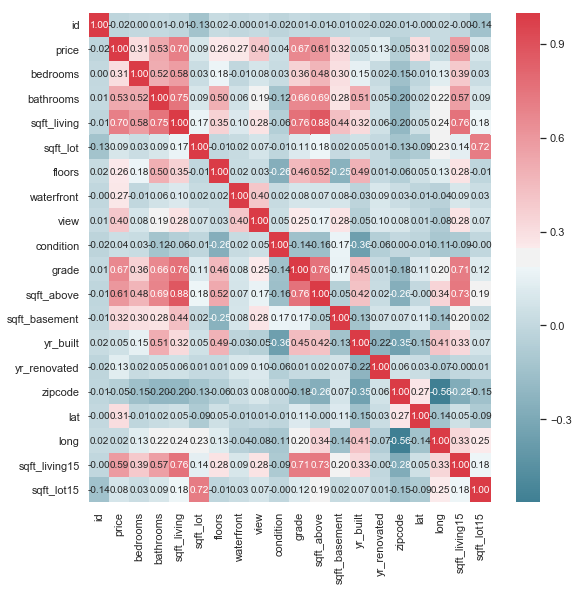

In [14]:
#create a correlation heatmap to see if there are trends between different features
corr_plot = df.corr()
fig, ax = plt.subplots(figsize = (9,9))
colormap=sns.diverging_palette(220,10, as_cmap=True)
_ = sns.heatmap(corr_plot,cmap=colormap,annot=True,fmt=".2f", xticklabels=corr_plot.columns, yticklabels=corr_plot.columns)
plt.show()

### So, square footage, building grade and number of bathrooms tops the price-correlation list. This matches the findings from the correlation heatmap which shows sqftliving, grade, sqftabove, sqftliving15 and bathrooms as most highly correlated with price.  The correlation table also shows us how the top 5 features are so much more correlated than all the rest of the features. This also matches the correlation heatmap findings.  The correlation heat map also found some additional interesting trends. One interesting trend was the high correlation between grade and sqft_living.  This could be due to newly built homes, with high building grade, being built larger. Another high correlation occured on the heatmap between number of bathrooms and sqft_living. This one makes sense since larger homes may have more bathrooms. Finally, an interesting but baffling strong negative correlation occured on the correlation heatmap between floors and condition implying the more floors the worse the building condition.  

(array([1.0000e+00, 3.0000e+00, 2.9000e+01, 2.4200e+02, 2.0380e+03,
        1.5049e+04, 2.6150e+03, 1.1340e+03, 3.9900e+02, 1.0300e+02]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

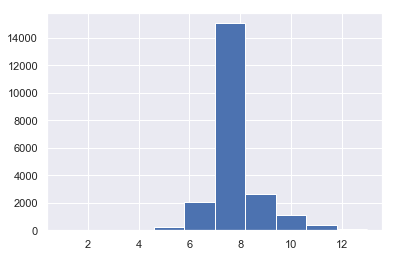

In [15]:
#since grade has a high correlation with price, take a look at how building grade data points are distributed on a histogram
plt.hist(df['grade'])

### In our correlation stats, building grade was one of the highest correlation features with price and the building grade histogram above indicates that the majority of King County real estate falls around a 7.5 building grade. 

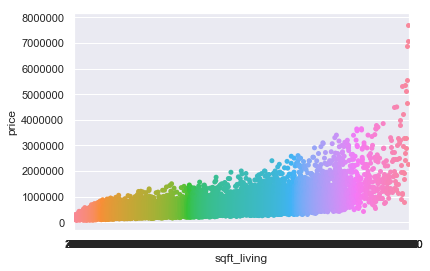

In [16]:
#take a look at a beeswarm plot for the highest correlated feature of sqft_living to look for any trends
_ = sns.swarmplot(x='sqft_living', y='price', data=df)

### The beeswarm plot shows a marked correlation between square foot living area and home price, which is certainly what we would expect based on earlier correlation stats.  

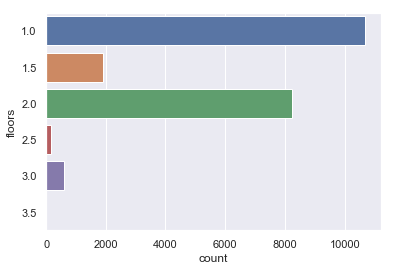

In [17]:
#take a look at a countplot of the number of floors and check which count is the highest, second highest etc
sns.countplot(y=df['floors'])

### Here we can see the majority of homes in King county, have one floor which is interesting since that trend might not apply to all counties. 

In [18]:
#take a look at the basement feature to see how it affects home price
home_w_basemt = df['sqft_basement'] > 0
print("the no of homes with a basement:", home_w_basemt.sum())
home_wo_basemt = df['sqft_basement'] == 0
print("the no of homes without a basement:", home_wo_basemt.sum())
print("mean home w/ basemt price:", np.mean(df[home_w_basemt]['price']))
print("mean home w/o basemt price:", np.mean(df[home_wo_basemt]['price']))
med1_bsmt = np.sort(df[home_w_basemt]['price'])
print(med1_bsmt[4243])
med2_bsmt = np.sort(df[home_wo_basemt]['price'])
print(med2_bsmt[6562])

the no of homes with a basement: 8487
the no of homes without a basement: 13126
mean home w/ basemt price: 622373.5638034642
mean home w/o basemt price: 486884.0905073899
515000.0
411500.0


## Violin plots displaying Median home price with and without a basement.

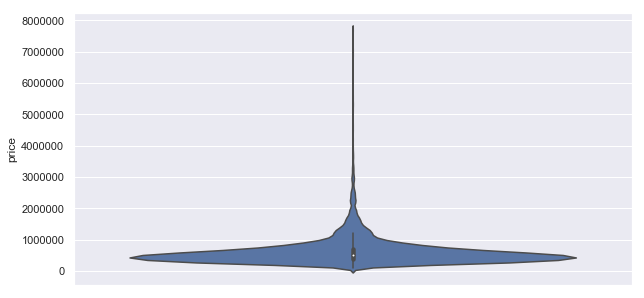

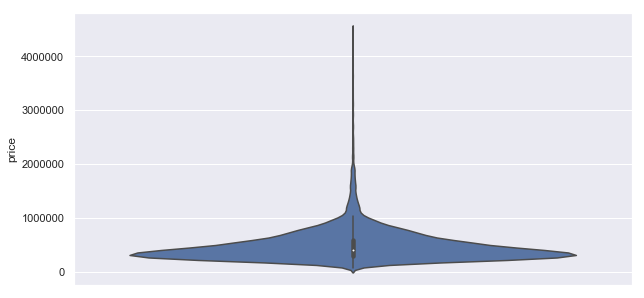

In [19]:
#create violin plots for median home price with and without a basement
from matplotlib import pyplot 
import seaborn
fig, ax = pyplot.subplots(figsize=(10,5))
sns.violinplot(ax=ax, y = df[home_w_basemt]['price'])
fig, ax = pyplot.subplots(figsize=(10,5))
sns.violinplot(ax=ax, y = df[home_wo_basemt]['price'])

### The violin plot on the top is the median home price with a basement and the violin plot on the bottom is the median home price without a basement.  The median home price without a basement, 411,500, is definitely much lower in price than that with a basement,515,000. There is also almost double the houses not having a basement,13,126, as those having a basement, 8,487, as evident by the shape of the violin plot.  The median home price with a basement, on the plots, also aligns well with the mean home price with a basement of 622373.5 dollars and without a basement of 486884 dollars. The reason the median home prices with a basement may not be aligning as close with the mean as without a basement,may be due to the higher priced homes skewing the mean.

In [20]:
#utilizing numpy mean, find means of different features
#create a variable for the no of bathrooms to do further data visualizations
no_of_bathrooms = df[['bathrooms']]
no_of_bedrooms = df[['bedrooms']]
no_of_floors = df[['floors']]
building_grade = df[['grade']]
mean_no_bedrms = np.mean(no_of_bedrooms)
mean_no_bathrms = np.mean(no_of_bathrooms)
mean_no_floors = np.mean(no_of_floors)
mean_building_grade = np.mean(building_grade)
print('mean no of ', mean_no_bedrms)
print('mean no of ', mean_no_bathrms)
print('mean no of ', mean_no_floors)
print('mean building ', mean_building_grade)

mean no of  bedrooms    3.370842
dtype: float64
mean no of  bathrooms    2.114757
dtype: float64
mean no of  floors    1.494309
dtype: float64
mean building  grade    7.656873
dtype: float64


### Performing numpy stats shows us that the average number of bedrooms is approx 3, the average number of bathrooms is 2 , the average number of floors is 1.5 and the average building grade is approx 7.5.

{'whiskers': [<matplotlib.lines.Line2D at 0x15ac809bd68>,
 'caps': [<matplotlib.lines.Line2D at 0x15ac809bc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x15ac63e8b00>],
 'medians': [<matplotlib.lines.Line2D at 0x15ac809b828>],
 'fliers': [<matplotlib.lines.Line2D at 0x15ac809c470>],
 'means': [<matplotlib.lines.Line2D at 0x15ac809c240>]}

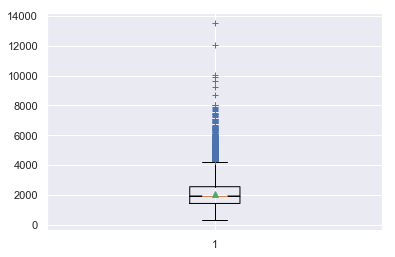

In [21]:
#take a look at how median for square foot living falls on a box and whisker plot.
plt.boxplot(df['sqft_living'],1, showmeans = True, sym = 'b+')

{'whiskers': [<matplotlib.lines.Line2D at 0x15aca12fb70>,
 'caps': [<matplotlib.lines.Line2D at 0x15aca12feb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15aca12f780>],
 'medians': [<matplotlib.lines.Line2D at 0x15aca12c9b0>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x15aca12cd30>]}

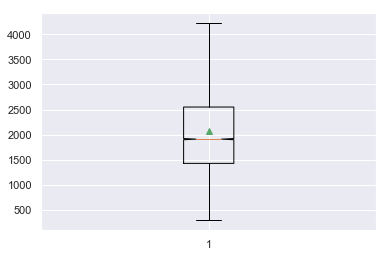

In [22]:
#compare that to the box and whisker plot without the outliers
plt.boxplot(df['sqft_living'],1, showmeans = True, sym = '')

In [23]:
#calculate the mean and median square foot living area
print('mean square footage is:', np.mean(df['sqft_living']))
sqft_med = np.sort(df['sqft_living'])
sqft_median = sqft_med[10806]
print("median square foot living area:", sqft_median)

mean square footage is: 2079.8997362698374
median square foot living area: 1910


### Since the boxplot median without outliers looks similar to that with outliers, we can conclude that the data so far appears well distributed.  The box and whisker plot also shows that the median square foot living area of 1,910 aligns closely with the mean square foot living area of 2,079.

In [24]:
#compute percentiles for the prices of homes which will also give the median home price
home_mean = np.mean(df['price'])
print('mean home price is:', home_mean)
percentiles = np.array([2.5, 25, 50, 75, 97.5])
prices_homes = df[['price']]
homes_percent = np.percentile(prices_homes,percentiles)
print("percentiles for homes at 2.5%, 25%, 50%, 75% and, 97.5% is:", homes_percent)

mean home price is: 540088.1417665294
percentiles for homes at 2.5%, 25%, 50%, 75% and, 97.5% is: [ 185000.  321950.  450000.  645000. 1485000.]


{'whiskers': [<matplotlib.lines.Line2D at 0x15aca21a390>,
 'caps': [<matplotlib.lines.Line2D at 0x15aca21aa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x15aca201f60>],
 'medians': [<matplotlib.lines.Line2D at 0x15aca21af28>],
 'fliers': [<matplotlib.lines.Line2D at 0x15aca2278d0>],
 'means': [<matplotlib.lines.Line2D at 0x15aca227550>]}

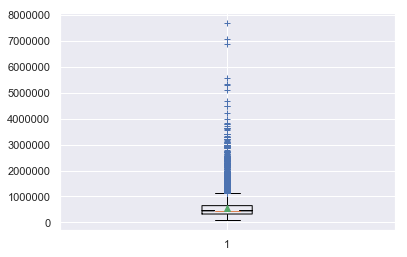

In [25]:
#create a box and whisker plot of home prices to see how that compares to percentiles just calculated, check for outliers
plt.boxplot(df['price'],1, showmeans = True, sym = 'b+')

### Based on the percentile assessment and box and whisker plot, the median of homes fall within the 450,000 dollar price range which differs from the mean of 540,088.  The plot, however, shows this may be due to some houses on the higher end of the dataset skewing the mean home price.

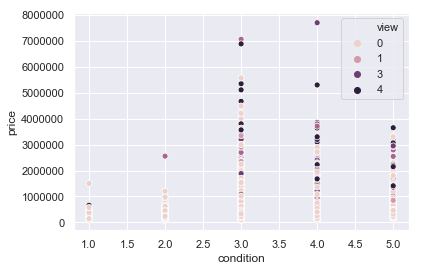

In [26]:
#take a look at relationship between the condition of a home and how many views it gets from prospective buyers
sns.scatterplot(x = 'condition', y = 'price', data = df, hue = 'view')
plt.show()

In [78]:
#calculate the mean building condition to see how it compares to the scatterplot
print("mean building condition:", np.mean(df['condition']))

mean building condition: 3.4094295100171195


### The scatterplot above shows two interesting but also intuitive trends. The first is that the number of views of prospective home buyers is highest when the price of the home is highest and is distributed equally within the 3, 4 and 5 building condition rating(5 being the best). It also shows a trend of high views amongst lower priced homes that are in good condition. What this shows is that the higher priced homes may have other attributes such as a good school system, surrounding neighborhood or short commute to work that may be just as important as building condition.  The high views of low priced homes with great building condition may be due to the fact that the home buyer is more concerned with the condition of the home which,of course, makes sense also.  

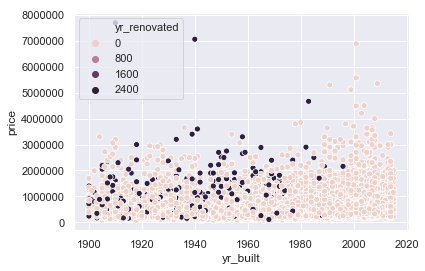

In [79]:
#take a look at the scatterplot between year built vs year renovated and price and notice if there are any trends
sns.scatterplot(x = 'yr_built', y = 'price', data =df, hue = 'yr_renovated')
plt.show()

### The interesting finding here is that even homes built in the early 1900's in King County can be just as highly priced as those built in the 2000's.  It makes sense that the majority of home renovations on the scatterplot are homes built before the 1980's.  

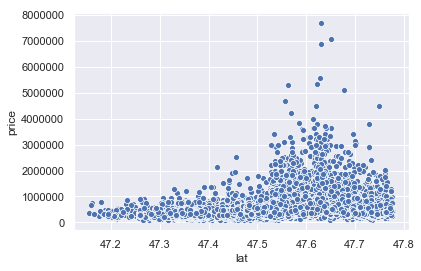

In [29]:
#take a look at trends between latitude and price and notice if there are any correlations
sns.scatterplot(x = 'lat',y = 'price', data = df)
plt.show()

### According to the scatter plot, the highest priced homes lie within the latitude of 47.6 which is Seattle, Medina and Bellevue, WA and also in latitude 47.7 which is Kirkland and Redmond,WA as well as 47.5 which is Mercer Island.  This does agree with King County house price trends in those areas.  https://gismaps.kingcounty.gov/iMap/

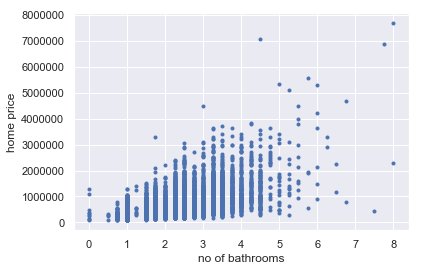

In [30]:
#Since the number of bathrooms was very highly correlated with price, 
#take a look at a scatterplot of no of bathrooms vs home price
_ = plt.plot(no_of_bathrooms, prices_homes, marker = '.', linestyle = 'none')
_ = plt.xlabel('no of bathrooms')
_ = plt.ylabel('home price')
plt.show()

### The scatterplot of bathrooms and home price shows a definite direct correlation between home price and the number of bathrooms. However, what's interesting is that after 3.5 bathrooms there are many data points within 4-5 bathrooms that are at the same price range of  3.5 bathrooms so it appears the home prices level off a bit after 3.5 bathrooms.

In [31]:
'''
Since histograms suffer from thinning bias, take a look next at the cumulative distribution function
in order to further analyze the distribution of the data.
'''
def ecdf(data):
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data) + 1)/ len(data)
    return xaxis, yaxis

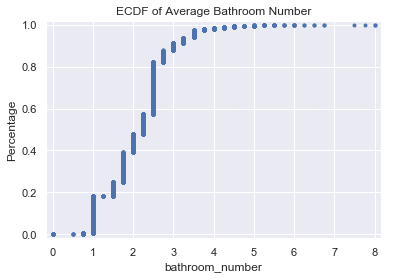

In [32]:
#compute ecdf for the number of bathrooms

x_bath, y_bath = ecdf(df['bathrooms'])
_ = plt.plot(x_bath, y_bath, marker = '.', linestyle = 'none')
_ = plt.title('ECDF of Average Bathroom Number')
_ = plt.xlabel('bathroom_number')
_ = plt.ylabel('Percentage')
_ = plt.margins(0.02)
plt.show()

### The cumulative distribution function shows that the 50% probability of number of bathrooms falls between 2 and 2.25 which makes sense since the calculated mean number of bathrooms in our dataset was 2.

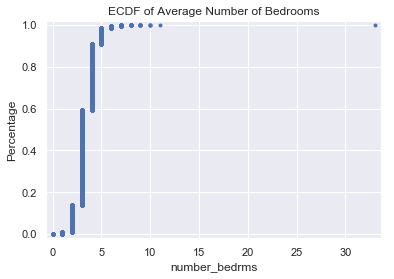

In [33]:
#create more variables to plot more ECDF visualizations(no of bedrooms)
x_bed, y_bed = ecdf(df['bedrooms'])
_ = plt.plot(x_bed, y_bed, marker = '.', linestyle = 'none')
_ = plt.title('ECDF of Average Number of Bedrooms')
_ = plt.xlabel('number_bedrms')
_ = plt.ylabel('Percentage')
_ = plt.margins(0.02)
plt.show()

### In this ecdf visualization for the number of bedrooms, the 50% probability is seen around 3 which also makes sense since it corresponds to our mean number of 3 bedrooms.

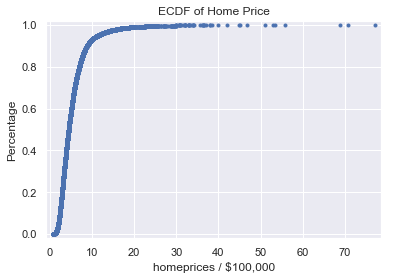

In [34]:
#plot the home prices on the ECDF plot 
x_pr, y_pr = ecdf(df['price'] * .00001)
_ = plt.plot(x_pr, y_pr, '.')
_ = plt.xlabel('homeprices / $100,000')
_ = plt.ylabel('Percentage')
_ = plt.title('ECDF of Home Price')
_ = plt.margins(0.02)
plt.show()

### The ecdf of home prices lies around 500,000 dollars which aligns closely with our other observations.

In [35]:
#create column of just the year only in order to plot ecdf
df['year'] = df['date'].apply(lambda row:row[:4])
df['year'].head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: year, dtype: object

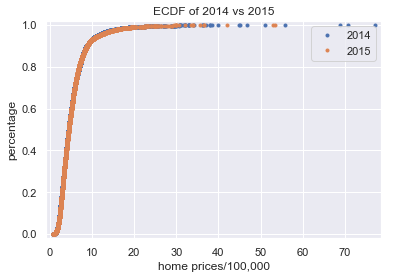

In [36]:
#define function for ecdf:
def plot_ecdf(data, title = "ECDF of 2014 vs 2015", xlabel = "home prices/100,000", ylabel = "percentage"):
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data) + 1)/ len(data)
    _ = plt.plot(xaxis, yaxis, marker = '.', linestyle = 'none')
    _ = plt.title(title)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.margins(0.02)

#create variable for year and plot ecdf for 2014 and 2015 to compare the average price percentage between the two years
years = df.year.unique()
df_simp = df['price'] * .00001
for year in years:
    plot_ecdf(df_simp[df.year == year])
plt.legend(labels=years)
plt.show()

### Plotting the home price with the ecdf shows us that the 50% probability of home prices falls around 500,000 dollars which also matches our calculated mean home price of 540,088 dollars.  The ecdf plot of 2014 vs 2015 homes shows that the average home price was roughly the same in both consecutive years. The ecdf visualizations also confirm that our data falls within a normal distribution for the most part however, we will need to investigate further with hypothesis testing to decide if the higher priced homes are outliers and need to be removed from the dataset.

## Frequentist/Bootstrap Hypothesis Testing:
### null hypoth: diff of means between full data sample and bootstrap random data sample = 0
### alt hypoth: diff of means between full data sample and bootstrap random data sample != 0

In [37]:
#In the previous visualizations we determined our data was normally distributed but that home mean price may/may not be skewed
#since our sample size > 30, we can also determine the observations are also independent
#therefore we begin bootstrap testing to compare our previous numpy mean(7.66) of building grade with bootstrap testing mean
bs_sample = np.random.choice(df['grade'], size = 100)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (100)**.5
bs_zsre = (bs_mean -7.66) / bs_zse
print("boot strap mean, standard deviation, and standard error is:", bs_mean,bs_std,bs_zse)
print("z_score is: ", bs_zsre)

boot strap mean, standard deviation, and standard error is: 7.5 1.0908712114635715 0.10908712114635714
z_score is:  -1.4667175952451394


### The z score above corresponds to a p value of .114 which is greater than .05, therefore we fail to reject the hypothesis and conclude that there is no statistical difference between the difference of the means even when a random bootstrap sample set is chosen and compared against the actual data set.

## In our data exploration and visualization, we determined that the mean home price was 540,088 dollars, the mean no of bathrooms was 2  and the mean no of bedrooms was 3.  We will statistically compare the difference of means between the mean house price having mean number(two) of bathrooms against mean home price having mean number(three) of bedrooms.

### Null hypoth: The difference of means of home price with 3 bedrooms and 2 bathrooms = 0  

### Alt hypoth: The difference of means of home price with 3 bedrooms and 2 bathrooms != 0

In [38]:
#take a look at home prices with 3 bedrooms
is_ave = df.bedrooms == 3
three_rms = df[is_ave]
print(len(three_rms), 'is number of three bedrm homes')
three_rms_price = three_rms['price']

9824 is number of three bedrm homes


In [39]:
#evaluate the mean of home prices with 3 bedrooms
print("three bedrm mean home price is:", np.mean(three_rms_price))

three bedrm mean home price is: 466232.07848127035


In [40]:
#calculate the mean home price with 2 bathrooms
is_ave_bath = df.bathrooms == 2
two_bath = df[is_ave_bath]
two_bath_price = two_bath['price']
print(len(two_bath), 'is no of 2 bathrm homes')
print("two bathrm mean home price is:", np.mean(two_bath_price))

1930 is no of 2 bathrm homes
two bathrm mean home price is: 457889.7186528497


In [41]:
#find the middle indices in order to determine the median of the dataset(indices start at index 0)
all_home_prices = df['price']
all_sorted_prices = np.sort(all_home_prices)
print(len(all_sorted_prices)/2)

10806.5


In [42]:
#print median home price to compare against mean home price
home_med = all_sorted_prices[10806]
print('median home price is:', home_med)

median home price is: 450000.0


### These findings suggest that the mean number of bedrooms(3) is associated with a mean home price of 466,232 dollars and the mean number of bathrooms(2) is associated with a mean home price of 457,890 dollars.  Although the 3 bedroom mean home price is more closely aligned with the overall mean home price of 540,088 dollars, the 2 bathroom mean home price is more closely aligned with the median home price of 450,000 dollars. This discrepancy may be due to the fact that there is a larger sample size(9824) of 3 bedrooms than that of two bathrooms(1930) or may again be due to the fact that the mean home price of 540,088 is being skewed by  higher priced homes(such as one home priced at 7 million dollars). If we, instead, compare our stats against the median home price, then the two bathroom homes appear very correlated which makes sense since correlation testing indicated that the number of bathrooms is more correlated with home price than the number of bedrooms.

In [43]:
#compare the two bathroom mean home price with three bedroom mean home price using hypothesis testing
diff_of_means = np.mean(three_rms_price) - np.mean(two_bath_price)
print("the diff of means is:", diff_of_means)

the diff of means is: 8342.359828420624


In [44]:
#import stats package to determine p value and to recheck z score above.
from statsmodels.stats.weightstats import ztest
z, pval = ztest(three_rms_price,two_bath_price, alternative='two-sided')
print('z: {} , pval: {}'.format(z, pval))

z: 1.3187908819369583 , pval: 0.1872390333994377


### Based on a 95% confidence interval, a p-value of .18 indicates that we cannot conclude that a statistical difference exists between the mean home price of two bathrooms and the mean home price of three bathrooms.
### This is exciting since it helps us in our home price prediction analysis.  Last we will compare the mean home price using bootstrapping method against the actual mean home price.  This will help us take a look at the mean home price given a random sample and also evaluates the validity of our data set.  

In [45]:
#compare the mean home price of actual dataset with mean home price of bootstrap sample
print("Mean home price is:",home_mean)
home_std = (np.std(df['price']))
print("Home standard deviation is:", home_std)
bs_sample = np.random.choice(df['price'], size = 2000)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (2000)**.5
bs_zsre = (bs_mean - 540088) / bs_zse
print("Bootstrap mean, Bootstrap std dev, and Bootstrap zscore:", bs_mean,bs_std,bs_zse)
print("Z_score is: ", bs_zsre)

Mean home price is: 540088.1417665294
Home standard deviation is: 367118.7031813722
Bootstrap mean, Bootstrap std dev, and Bootstrap zscore: 534912.0725 339551.10328288475 7592.593487755823
Z_score is:  -0.6817074440172436


### Based on the p-value of >.05, we can fail to reject the hypothesis that there is a statistical difference between  the mean of our bootstrap sample and the mean of our housing price data set.  

In [46]:
#now take a look at confidence interval and margin of error for mean home price
diffe_of_means = home_mean - bs_mean
twosamp_std = ((((bs_std)**2)/2000) + (((home_std)**2)/21613))**.5
m_of_err = 1.96 * (twosamp_std)
print("margin of error is:", m_of_err)
conf_int = (diffe_of_means + m_of_err), (diffe_of_means - m_of_err)
print("confidence interval is:", conf_int)

margin of error is: 15665.70496211164
confidence interval is: (20841.774228641043, -10489.635695582236)


### Within a margin of error of 14,984 dollars, we can be 95% certain that the confidence interval range above contains our true mean.  The high standard deviation however in both the bootstrap data set as well as the actual dataset is an indication that there is a large range and high degree of variability of some data points from the mean.  This might be due to the few houses that are on the higher end of the dataset.  This is an important finding from our hypothesis and statistical testing as it indicates that, as the dataset stands, the median is a more reliable measurement of central tendency.  It also indicates, that these outliers,or higher priced homes, may need to be removed from the dataset. However, before removing these values from the dataset, we will utilize the logarithmic function to see if that normalizes out the home prices and decreases the spread.  

In [81]:
#compute percentiles again for the prices of homes but this time utilizing log f(x) 
l_price = np.log(df['price'])
print("log mean home price is:", np.mean(l_price))
percentiles = np.array([2.5, 25, 50, 75, 97.5])
l_prices_homes = np.log(df[['price']])
l_homes_percent = np.percentile(l_prices_homes,percentiles)
print("log home percentiles for 2.5%, 25%, 50%, 75% and,97.5% is:", l_homes_percent)
print('median home price(50th percentile) is:', np.log(home_med))

log mean home price is: 13.047816917155423
log home percentiles for 2.5%, 25%, 50%, 75% and,97.5% is: [12.1281111  12.68215153 13.01700286 13.3770056  14.21092533]
median home price(50th percentile) is: 13.017002861746503


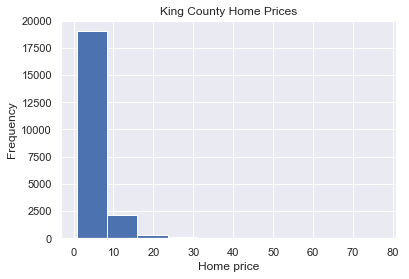

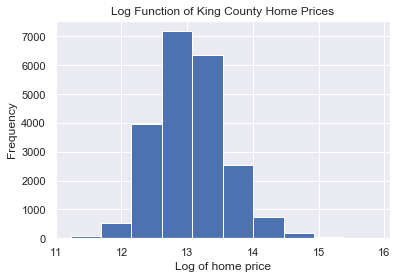

In [91]:
#plot out log of price in histogram to see if it improves the home price distribution(compare againt orig home price histogram)
plt.hist(df['price']*.00001)
plt.title("King County Home Prices")
plt.xlabel("Home price")
plt.ylabel("Frequency")
plt.show()
plt.hist(l_price)
plt.title("Log Function of King County Home Prices")
plt.xlabel("Log of home price")
plt.ylabel("Frequency")
plt.show()

### The histogram above shows a considerable improvement in distribution by taking the log of home prices

In [49]:
#do hypothesis testing again on log of price data and re-evaluate z-score, std dev and mean to insure improvement
l_home_mean = np.mean(l_price)
print("mean log home price is:", l_home_mean)
l_home_std = (np.std(l_price))
print("log std is:", l_home_std)
l_bs_sample = np.random.choice(l_price, size = 2000)
l_bs_mean = np.mean(l_bs_sample)
l_bs_std = np.std(l_bs_sample)
l_bs_zse = l_bs_std / (2000)**.5
l_bs_zsre = (l_bs_mean - 13.05) / l_bs_zse
print('bootstrap mean is:', l_bs_mean)
print('bootstrap std is:', l_bs_std)
print('bootstrap zscore is:', l_bs_zse)

mean log home price is: 13.047816917155423
log std is: 0.5266723344538438
bootstrap mean is: 13.038290228132032
bootstrap std is: 0.5138135571744233
bootstrap zscore is: 0.011489220416029853


### The p value greater than .05 indicates that there is not a statistical difference between the log of the actual home price mean and the log of the bootstrap home price mean.

In [50]:
#measure margin of error and conf interval
l_diff_of_means = l_home_mean - l_bs_mean
l_twosamp_std = ((((l_bs_std)**2)/2000) + (((l_home_std)**2)/21613))**.5
l_m_of_err = 1.96 * (l_twosamp_std)
print('margin of error is:', l_m_of_err)
l_conf_int = (l_diff_of_means + l_m_of_err), (l_diff_of_means - l_m_of_err)
print('confidence interval is:', l_conf_int)

margin of error is: 0.023588199097302056
confidence interval is: (0.03311488812069255, -0.014061510073911567)


### Before having taken the log function of home prices, the standard deviation measurement indicated a large spread from the mean.  Now, after taking the log function of home prices, the standard deviation and confidence interval indicates an improved variance from the central mean.

In [82]:
#find mean of prices with diff features as well as median of log home price to compare it to the log of the home price mean
l_two_bath_price = np.log(two_bath['price'])
print('mean for two bathrooms is:', np.mean(l_two_bath_price))
l_three_rms_price = np.log(three_rms['price'])
print('mean for three bedrooms is:', np.mean(l_three_rms_price))
print("mean log home price is:", l_home_mean)

mean for two bathrooms is: 12.945214978866858
mean for three bedrooms is: 12.936713402637833
mean log home price is: 13.047816917155423


### Comparing the log of mean home price, log of median home price, and the log of mean home price with three bedrooms and two bathrooms,respectively, taking the log function of home prices improves alignment with central tendency. 

{'whiskers': [<matplotlib.lines.Line2D at 0x15acc8decc0>,
 'caps': [<matplotlib.lines.Line2D at 0x15acc8e8400>,
 'boxes': [<matplotlib.lines.Line2D at 0x15acc8de8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15acc8e8b00>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x15acc8e8e80>]}

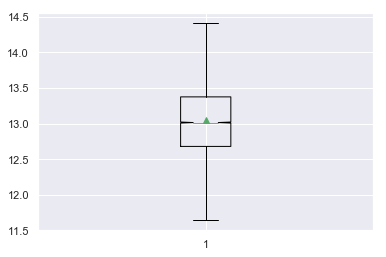

In [52]:
# take a look at the box and whisker plot with log of price and showmeans=True
# see how the data is distributed as well as if the median lies close to the mean
plt.boxplot(l_price, 1, showmeans = True, sym = '')

### Taking the log function of price calculates to a mean home price of 13.05 and a median home price of 13.02.  The box and whisker plot also visually indicates an improved distribution with taking the log function of home prices. In conclusion, we will not remove the higher priced homes from the dataset but rather utilize the logarithmic function on home price values.

In [53]:
#create new column for log of prices 
df['log_price'] = np.log(df['price'])
df['log_price'].head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: log_price, dtype: float64

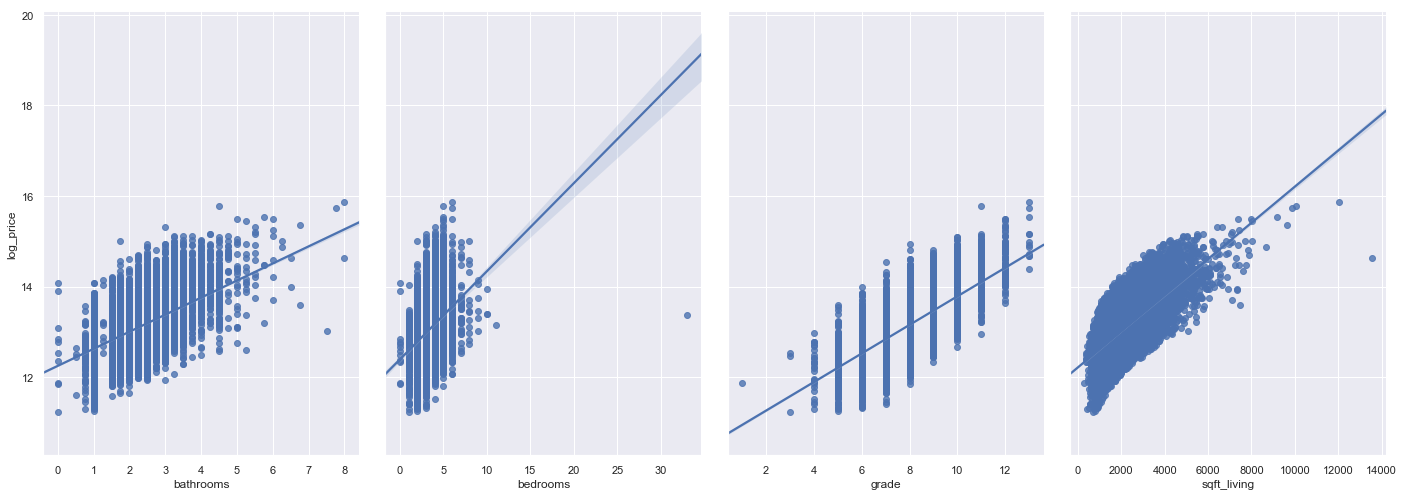

In [54]:
#fit linear regression line to the scatter plot and take a look at which features to choose for the linear regression model
sns.pairplot(df, x_vars = ['bathrooms', 'bedrooms', 'grade','sqft_living'], y_vars = ['log_price'], height=7, aspect=0.7, kind='reg')

In [55]:
#import packages to begin regression testing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### We will use supervised learning since all the data is labeled and also use a regression machine learning algorithm since the response being predicted, the price of a homes, is ordered and continuous.

In [56]:
#create a data array starting with features we've previously tested that have a strong correlation with price
x_cols = ['grade', 'bathrooms', 'sqft_living','bedrooms']
X = df[x_cols]
X.head()

,grade,bathrooms,sqft_living,bedrooms
0,7,1.00,1180,3
1,7,2.25,2570,3
2,6,1.00,770,2
3,7,3.00,1960,4
4,8,2.00,1680,3


In [57]:
#assign the predictor(target) variable
y = np.log(df['price'])
y.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

In [58]:
#create a linear regression model for building grade(feature chosen) vs price(response)
#make sure both are numeric, same shape and convert both to numpy arrays
from sklearn.linear_model import LinearRegression
linreg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state=42)
linreg.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 4) (6484, 4) (15129,) (6484,)


In [59]:
#calculate the coefficients
linreg.coef_

array([ 0.18338046, -0.01053386,  0.00023878, -0.01946108])

In [60]:
#create a prediction model that closely predicts y_test #take the mean squared error
y_pred = linreg.predict(X_test)
np.mean((y_pred - y_test) **2)

0.12606356342189376

In [61]:
#now import sklearn package and compare mean squared error calculated with the sklearn package vs calculated manually 
from sklearn.metrics import mean_squared_error
mse = np.mean((y_pred - y_test) **2)
mse_r = mse ** (1/2)
print("root mean square error is:", mse_r)
print("mean square error is:", mean_squared_error(y_test, y_pred))
r2_score = linreg. score(X,y)
print("r2 score is:", r2_score)

root mean square error is: 0.35505431052431086
mean square error is: 0.1260635634218936
r2 score is: 0.5562437095113519


In [62]:
# Import regression modules and utilize ordinary least squares
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('log_price ~ sqft_living',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        14:58:57   Log-Likelihood:                -9670.2
No. Observations:               21613   AIC:                         1.934e+04
Df Residuals:                   21611   BIC:                         1.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2185      0.006   1916.883      

### Looking at the r^2 for all the individual features with price indicates that the following features have near zero r^2 value( long, zipcode, yr_renovated and yr_built). Therefore, these features will be left out of the machine learning model.  The highest r^2 when comparing individual features with price are( grade, sqft_living, sqft_above and sqft_living15).  

[ 1.90266899e-01 -1.50377748e-04  2.83273384e-04  8.89415986e-05]
0.12253644683787945
root mean square error is: 0.35005206303902775
mean square error is: 0.1225364468378786
r2 score is: 0.5697357160331856


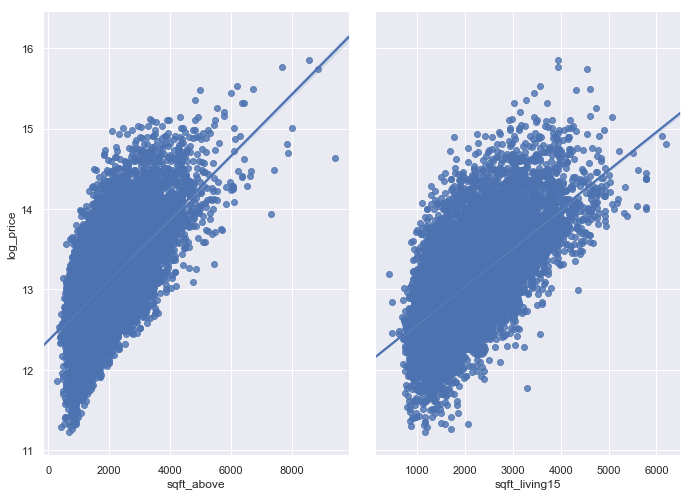

In [83]:
#utilize the top four features that individually have the highest r^2 and see how this changes prediction model
sns.pairplot(df, x_vars = ['sqft_above','sqft_living15'], y_vars = ['log_price'], height=7, aspect=0.7, kind='reg')
X1 = df[['grade', 'sqft_above', 'sqft_living','sqft_living15']]
X_train, X_test, y_train, y_test = train_test_split(X1,y,train_size = 0.7,random_state=42)
linreg.fit(X_train,y_train)
print(linreg.coef_)
y_pred = linreg.predict(X_test)
print(np.mean((y_pred - y_test) **2))
mse = np.mean((y_pred - y_test) **2)
mse_r = mse ** (1/2)
print("root mean square error is:", mse_r)
print("mean square error is:", mean_squared_error(y_test, y_pred))
r2_score = linreg. score(X1,y)
print("r2 score is:", r2_score)

[-4.39128350e-03  1.35905130e-01  1.84937984e-02 -1.11901059e+09
  1.11901059e+09  7.06322027e-05  1.11901059e+09  1.00825002e-01
  1.47991200e+00]
0.07805923172010305
root mean square error is: 0.27939082254094005
mean square error is: 0.07805923172010318
r2 score is: 0.728826966963984


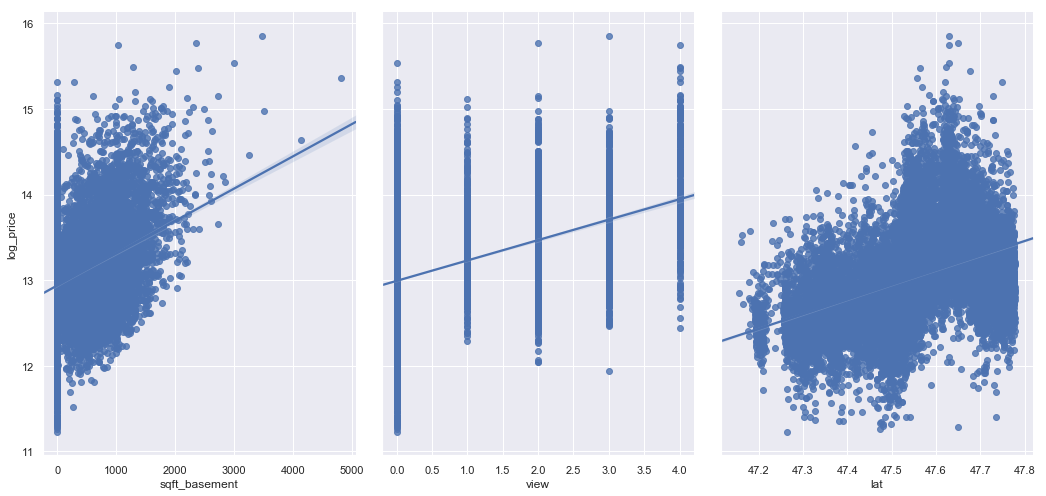

In [64]:
#add in bedrooms, bathrooms, sqft_basement, lat and view to see how that affects model.
#take a look at plots of those new features as well
sns.pairplot(df, x_vars = ['sqft_basement','view','lat'], y_vars = ['log_price'], height=7, aspect=0.7, kind='reg')
X2 = df[['bedrooms','grade', 'bathrooms', 'sqft_living','sqft_above','sqft_living15','sqft_basement','view','lat']]
X_train, X_test, y_train, y_test = train_test_split(X2,y,train_size = 0.7,random_state=42)
linreg.fit(X_train,y_train)
print(linreg.coef_)
y_pred = linreg.predict(X_test)
print(np.mean((y_pred - y_test) **2))
mse = np.mean((y_pred - y_test) **2)
mse_r = mse ** (1/2)
print("root mean square error is:", mse_r)
print("mean square error is:", mean_squared_error(y_test, y_pred))
r2_score = linreg. score(X2,y)
print("r2 score is:", r2_score)

### Based on this, adding more features does indeed improve the model. Try adding in even more high r^2 value features to see if there is further improvement.

[-3.94740914e-03  1.39320822e-01  1.98076859e-02  1.18565246e-04
  4.39420089e-05  8.20284805e-05  7.46232373e-05  7.85063628e-02
  1.49161207e+00  4.43243986e-07 -3.07265041e-07  9.26085915e-02
  3.51316878e-02  4.05972207e-01]
0.07219601874805955
root mean square error is: 0.2686931684060083
mean square error is: 0.07219601874805977
r2 score is: 0.7464024670693175


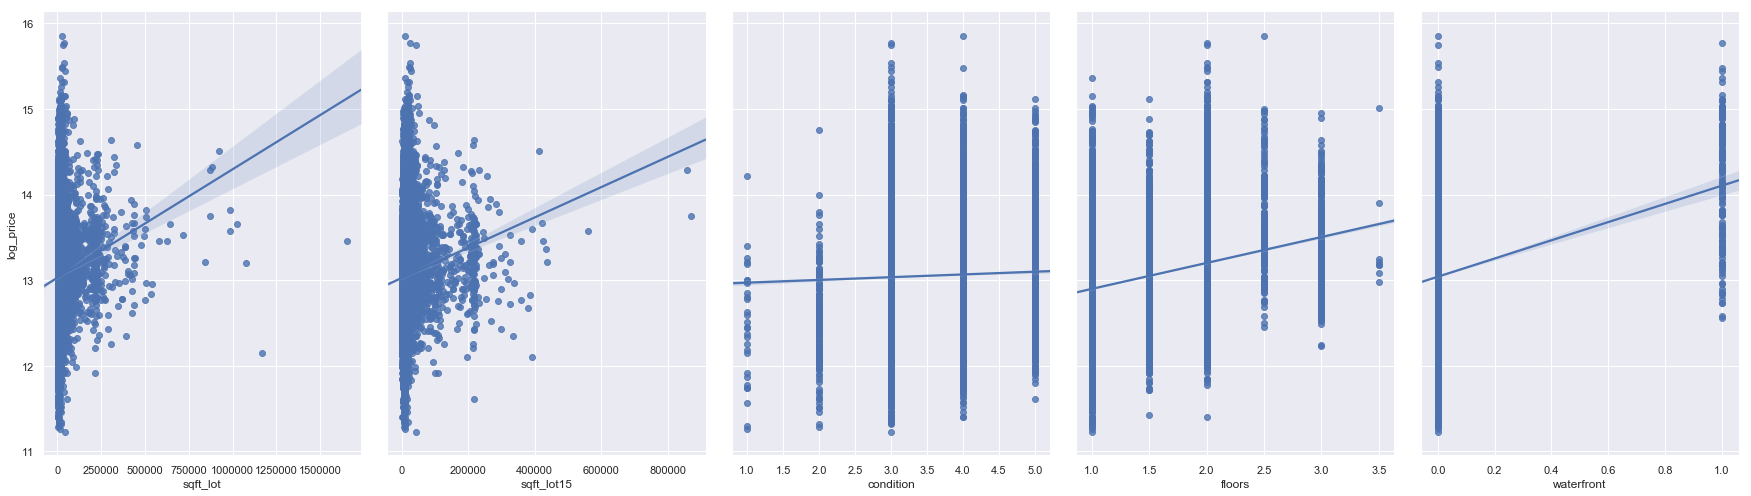

In [65]:
# add in waterfront, sqft_lot,floors, condition and sqft_lot15 to previous features for a total of 14 features
sns.pairplot(df, x_vars = ['sqft_lot', 'sqft_lot15','condition','floors','waterfront'], y_vars = ['log_price'], height=7, aspect=0.7, kind='reg')
X3 = df[['bedrooms','grade', 'bathrooms', 'sqft_living','sqft_above','sqft_living15','sqft_basement','view','lat','sqft_lot', 'sqft_lot15','condition', 'floors', 'waterfront']]
X_train, X_test, y_train, y_test = train_test_split(X3,y,train_size = 0.7,random_state=42)
linreg.fit(X_train,y_train)
print(linreg.coef_)
y_pred = linreg.predict(X_test)
print(np.mean((y_pred - y_test) **2))
mse = np.mean((y_pred - y_test) **2)
mse_r = mse ** (1/2)
print("root mean square error is:", mse_r)
print("mean square error is:", mean_squared_error(y_test, y_pred))
r2_score = linreg. score(X3,y)
print("r2 score is:", r2_score)

### Adding even more features, improved the model further.  Next we will determine if removing certain features based on stats above will improve the model. Also utilize different ways to test the model to eliminate bias. 

In [66]:
# remove sqft_lot15 from features and take a look at how model compares
X4 = df[['grade','bedrooms','bathrooms','waterfront','condition', 'sqft_living','sqft_above','sqft_living15','sqft_basement','sqft_lot','floors','view','lat']]
X_train, X_test, y_train, y_test = train_test_split(X4,y,train_size = 0.7,random_state=42)
linreg.fit(X_train,y_train)
print(linreg.coef_)
y_pred = linreg.predict(X_test)
mse = np.mean((y_pred - y_test) **2)
mse_r = mse ** (1/2)
print("mean sq error is:", mean_squared_error(y_test, y_pred))
print("root mean square error is:", mse_r)
r2_score = linreg. score(X4,y)
print("r2 score is:", r2_score)

[ 1.39574163e-01 -3.63899601e-03  2.00607618e-02  4.05247089e-01
  9.26033144e-02  1.18307247e-04  4.35520819e-05  8.09033818e-05
  7.47551651e-05  2.94898115e-07  3.55908686e-02  7.85294637e-02
  1.49340077e+00]
mean sq error is: 0.07233176471152444
root mean square error is: 0.2689456538253122
r2 score is: 0.7461715983737274


In [67]:
#take a look at how model is predicting prices, see if its similar
print(y_pred[0])
print(y_test[0])

12.985266403063846
12.309982108920686


## After looking at several different feature combinations and comparing R^2, pvalue,coefficients, RMSE and MSE, it seems that the model with 14 features is giving the best prediction model with the highest linear regression scoring model at 75%.  We will take a look at a couple more algorithms to compare the different features but also to see which algorithm is the best predictor of home prices. 

In [84]:
#utilize the random forest regressor model
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X4,y,random_state=0)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=0)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.977
accuracy on the training subset:0.856


In [85]:
#compare same algorithm on different features
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=0)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.776
accuracy on the training subset:0.487


In [86]:
#different features tested
X_train, X_test, y_train, y_test = train_test_split(X2,y,random_state=0)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=0)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.974
accuracy on the training subset:0.831


In [87]:
#different features tested
X_train, X_test, y_train, y_test = train_test_split(X1,y,random_state=0)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=0)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.911
accuracy on the training subset:0.517


In [88]:
#different features tested 
X_train, X_test, y_train, y_test = train_test_split(X3,y,random_state=0)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=0)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.977
accuracy on the training subset:0.859


In [73]:
#utilize also chi square feature to select best features for machine learning model
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
#sel = SelectKBest(chi2, k=2)
#sel.fit(X,y)
#sel.transform(X).shape
#sel.scores_

In [90]:
#do same thing but with the Gradient Boosting Regressor Algorithm
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test = train_test_split(X4,y,random_state=0)
est = GradientBoostingRegressor(n_estimators=500,max_depth=4,learning_rate=0.1,min_samples_leaf=3,random_state=0)
est.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(est.score(X_train,y_train)))
print("accuracy on the training subset:{:.3f}".format(est.score(X_test,y_test)))

accuracy on the training subset:0.911
accuracy on the training subset:0.863


In [89]:
#compare model with all 14 features utilized
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test = train_test_split(X3,y,random_state=0)
est = GradientBoostingRegressor(n_estimators=500,max_depth=4,learning_rate=0.1,min_samples_leaf=3,random_state=0)
est.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(est.score(X_train,y_train)))
print("accuracy on the training subset:{:.3f}".format(est.score(X_test,y_test)))

accuracy on the training subset:0.913
accuracy on the training subset:0.867


In [76]:
#perform Ridge regularization testing
X_train,X_test,y_train,y_test = train_test_split(X3,y,random_state=42)
ridge_regr = linear_model.Ridge(alpha = .0001, normalize=True)
ridge_model = ridge_regr.fit(X_train,y_train)
print("ridge model score is:", ridge_model.score(X_test,y_test))

ridge model score is: 0.7503880207267329


In [77]:
#perform lasso regularization testing
X_train,X_test,y_train,y_test = train_test_split(X3,y,random_state=42)
lasso_regr = linear_model.Lasso(alpha = .00001, normalize=True)
lasso_model = lasso_regr.fit(X_train,y_train)
print("lasso model score is:", lasso_model.score(X_test,y_test))

lasso model score is: 0.7500276139424724


## In comparing the linear regression model, random forest regressor and gradient boosting regressor,the gradient boosting regressor is the classifier that gives us the highest score(91% and 87%) for both our training and test model and utilized 14 features from our original dataset.